In [2]:
# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

from tqdm import tqdm
import string
import statistics
import re
import joblib
import random
import statistics
from collections import Counter
from scipy import stats
import os
# import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity
import zipfile
from matplotlib.lines import Line2D
import warnings

In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
bdlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/bangladesh_livechat_data.parquet')
# brlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/brasil_livechat_data.parquet')
# idlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/indonesia_livechat_data.parquet')
# mllc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/malaysia_livechat_data.parquet')

# bdlc = pd.read_parquet('/kaggle/input/esports-data/live_comments_2/pakistan_livechat_data.parquet')
# indlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/india_livechat_data.parquet')
# ind2lc = pd.read_parquet('/kaggle/input/esports-data/live_comments/indiav2_livechat_data.parquet')
# trlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/turkey_livechat_data.parquet')
# vnlc = pd.read_parquet('/kaggle/input/esports-data/live_comments/vietnam_livechat_data.parquet')

In [ ]:
# tqdm.pandas()
# bdlc['new'] = bdlc.message.progress_apply(translate_text)

In [ ]:
# bdlc = pd.concat([indlc, ind2lc], ignore_index=True)

In [ ]:
# dfs_lc = ['bdlc', 'idlc', 'mllc', 'pklc', 'inlc', 'vnlc']
# sm = 0
# for df_name in dfs_lc:
#     df = globals()[df_name]
#     print(f"Length of {df_name}: {len(df)/1e6:.2f}M")
#     sm+=len(df)

# print(f'Total is {sm/1e6:.2f}M')
# print(f'Total in crore {sm/1e7:.2f}Corer')

## Bangladesh

In [ ]:
import emoji

def replace_emoji_codes(text):
    """
    Replace text-based emoji codes with actual emojis using the `emoji` library.

    Parameters:
    - text (str): The input text containing emoji codes.

    Returns:
    - str: The text with emoji codes replaced by actual emojis.
    """
    # Convert text-based emoji codes to actual emojis
    return emoji.emojize(text)

# Example usage
text = "A1 :red_heart: A1 :red_heart:"
converted_text = replace_emoji_codes(text)
print(converted_text)  # Output: "A1 ❤️ A1 ❤️"

import re

def count_words(text):
    # Remove punctuations using regular expression
    text_without_punctuations = re.sub(r'[^\w\s]', '', text)

    # Split the text into words based on whitespace characters
    words = text_without_punctuations.split()

    # Get the number of words
    word_length = len(words)

    return word_length


In [ ]:
tqdm.pandas()

In [ ]:
bdlc['wordcount'] = bdlc.message.progress_apply(count_words)

bdlc = bdlc.sort_values(by='wordcount', ascending=False).reset_index(drop=True)

In [ ]:
bdlc.tail()

## Checkpoint for filter

In [ ]:
th = 200_000


filt = bdlc[:th].copy()
filt.head()

In [ ]:
filt['message'] = filt.message.progress_apply(replace_emoji_codes)

# filt = filt[filt['wordcount'] >= 2]

filt.tail()

In [ ]:
print(bdlc.shape)
print(filt.shape)

In [ ]:
filt['datetime'] = pd.to_datetime(filt['datetime'])

# Extract the year and create a new column 'year'
filt['year'] = filt['datetime'].dt.year

filt.year.value_counts()

In [ ]:
(365532/1998563)*100

In [ ]:
(24544/100000)*100

In [ ]:
# tqdm.pandas()
# filt['message'] = filt.message.progress_apply(replace_emoji_codes)
# filt.head(2)

In [ ]:
filt.wordcount.describe()

In [ ]:
# filt['message'][61224]

In [ ]:
import torch
print(torch.cuda.is_available())  # Should print True if GPU is available
print(torch.cuda.current_device())  # Prints the ID of the current device
print(torch.cuda.get_device_name(0))  # Prints the name of the GPU

In [ ]:
model_path = 'cardiffnlp/twitter-roberta-base-sentiment-latest'

In [ ]:
from transformers import pipeline
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, device=0)
sentiment_task("Covid cases are increasing fast!")

In [ ]:
def make_pred(text):
    try:
        return sentiment_task(text)[0]['label']
    except:
        return 'neutral'
make_pred('i love you.')

In [ ]:
xt = filt['message'][6125]
make_pred(xt)

In [ ]:
filt['sentiment'] = filt.message.progress_apply(make_pred)

In [ ]:
filt.sentiment.value_counts()

In [ ]:
filt.tail()

In [ ]:
# make_pred('বালের খেলা করো। ফালতু যতসব। ')

In [ ]:
filt.year.value_counts()

In [ ]:
grouped = filt.groupby(['year', 'sentiment']).size().unstack(fill_value=0)

In [ ]:
grouped

In [ ]:
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100
grouped_percentage

In [ ]:
# Plotting the stacked bar chart
grouped_percentage.plot(kind='barh', stacked=True)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
# plt.title('Sentiment Distribution by Year')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=3)

# Display the plot
plt.show()

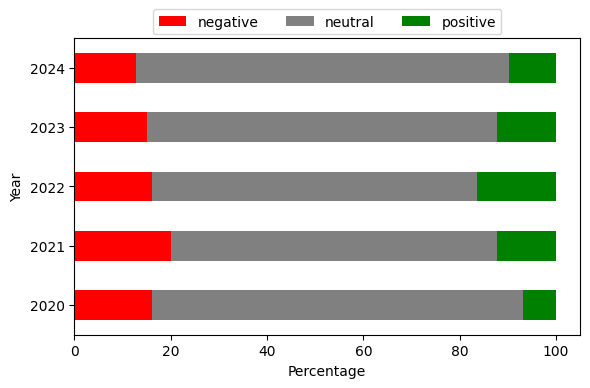

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Data
# data = {
#     'year': [2019, 2020, 2021, 2022, 2023, 2024],
#     'negative': [9.03, 16.14, 20.01, 16.12, 15.16, 12.87],
#     'neutral': [71.61, 76.95, 67.75, 67.41, 72.57, 77.45],
#     'positive': [19.35, 6.91, 12.24, 16.47, 12.27, 9.68]
# }

data = {
    'year': [2020, 2021, 2022, 2023, 2024],
    'negative': [16.14, 20.01, 16.12, 15.16, 12.87],
    'neutral': [76.95, 67.75, 67.41, 72.57, 77.45],
    'positive': [6.91, 12.24, 16.47, 12.27, 9.68]
}

# Create a DataFrame
grouped_percentage = pd.DataFrame(data).set_index('year')

# Plotting the stacked horizontal bar chart
grouped_percentage.plot(kind='barh', stacked=True, figsize=(6, 4), color=['red', 'gray', 'green'])

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Year')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=3)

# Display the plot
plt.tight_layout()
plt.show()

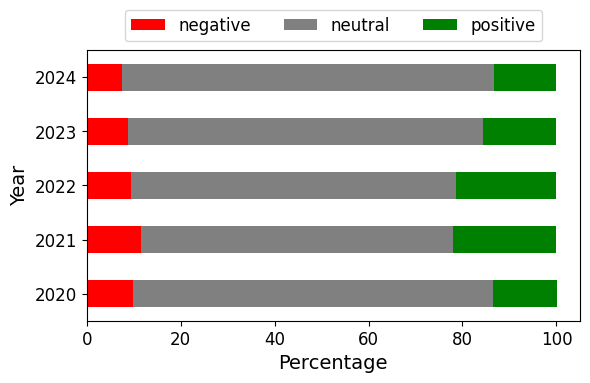

In [7]:

# data = {
#     'year': [2019, 2020, 2021, 2022, 2023, 2024],
#     'negative': [5.31, 9.86, 11.63, 9.39, 8.76, 7.57],
#     'neutral': [76.80, 76.57, 66.25, 69.28, 75.52, 79.20],
#     'positive': [17.90, 13.58, 22.12, 21.33, 15.71, 13.22]
# }


data = {
    'year': [ 2020, 2021, 2022, 2023, 2024],
    'negative': [ 9.86, 11.63, 9.39, 8.76, 7.57],
    'neutral': [ 76.57, 66.25, 69.28, 75.52, 79.20],
    'positive': [ 13.58, 22.12, 21.33, 15.71, 13.22]
}




# Create a DataFrame
grouped_percentage = pd.DataFrame(data).set_index('year')

# Plotting the stacked horizontal bar chart
ax = grouped_percentage.plot(kind='barh', stacked=True, figsize=(6, 4), color=['red', 'gray', 'green'])

# Add labels and title with increased font size
ax.set_xlabel('Percentage', fontsize=14)
ax.set_ylabel('Year', fontsize=14)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.18), ncol=3, fontsize=12)

# Adjust font size for ticks
ax.tick_params(axis='both', which='major', labelsize=12)

# Display the plot
plt.tight_layout()
plt.show()


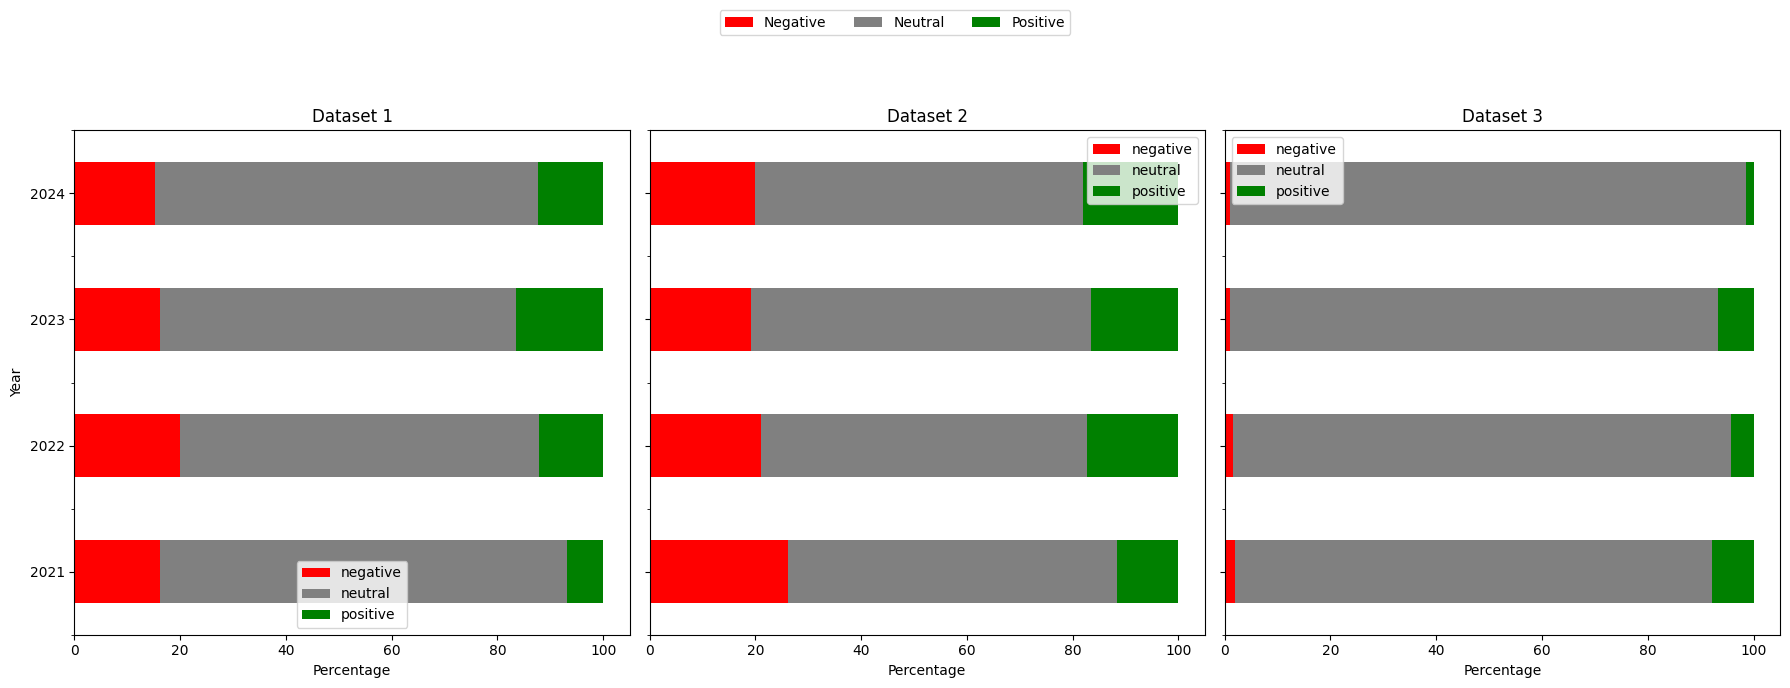

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for Bangladesh (BD), India (IND), Pakistan (PAK)
data_bd = {
    'year': [2020, 2021, 2022, 2023, 2024],
    'negative': [16.14, 20.01, 16.12, 15.16, 12.87],
    'neutral': [76.95, 67.75, 67.41, 72.57, 77.45],
    'positive': [6.91, 12.24, 16.47, 12.27, 9.68]
}

data_ind = {
    'year': [2020, 2021, 2022, 2023, 2024],
    'negative': [26.20, 21.00, 19.16, 19.97, 17.06],
    'neutral': [62.17, 61.73, 64.31, 62.06, 75.63],
    'positive': [11.63, 17.27, 16.53, 17.97, 7.31]
}

data_pak = {
    'year': [2021, 2022, 2023, 2024],
    'negative': [1.94, 1.48, 0.99, 0.97],
    'neutral': [90.26, 94.30, 92.29, 97.64],
    'positive': [7.80, 4.22, 6.72, 1.39]
}

df1 = pd.DataFrame(data_bd).set_index('year')
df2 = pd.DataFrame(data_ind).set_index('year')
df3 = pd.DataFrame(data_pak).set_index('year')

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for the first dataset
df1.plot(kind='barh', stacked=True, ax=axs[0], color=['red', 'gray', 'green'])
axs[0].set_title('Dataset 1')
axs[0].set_xlabel('Percentage')
axs[0].set_ylabel('Year')

# Plot for the second dataset
df2.plot(kind='barh', stacked=True, ax=axs[1], color=['red', 'gray', 'green'])
axs[1].set_title('Dataset 2')
axs[1].set_xlabel('Percentage')

# Plot for the third dataset
df3.plot(kind='barh', stacked=True, ax=axs[2], color=['red', 'gray', 'green'])
axs[2].set_title('Dataset 3')
axs[2].set_xlabel('Percentage')

# Adjust layout and legend
plt.tight_layout()
fig.legend(['Negative', 'Neutral', 'Positive'], loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)

# Display the plot
plt.show()

In [ ]:
# from transformers import pipeline
# from datasets import Dataset
# # import pandas as pd
# # Example data
# data = {
#     'text': [
#         "Covid cases are increasing fast!",
#         "I am feeling great today!",
#         "This is a terrible situation.",
#         # Add more examples as needed
#     ]
# }
# df = pd.DataFrame(data)
# dataset = Dataset.from_pandas(df)

# dataset

In [ ]:

# # Define the function to analyze sentiments
# def analyze_sentiments(batch):
#     results = sentiment_task(batch['message'])
#     return {'sentiment': [result['label'] for result in results],
#             'score': [result['score'] for result in results]}

In [ ]:





# # Apply sentiment analysis to the dataset
# results_dataset = dataset.map(analyze_sentiments, batched=True)

# # # Convert results to a DataFrame
# results_df = pd.DataFrame(results_dataset)

# # # Print results
# # print(results_df.head())


In [ ]:
# results_df

In [ ]:
# dataset = Dataset.from_pandas(filt)
# dataset

In [ ]:
# results_dataset = dataset.map(analyze_sentiments, batched=True)